<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Data_analyst_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"977eb592f0fe57a4c97e7d050cf9c637"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
# List available datasets.
!kaggle datasets list

-rw-r--r-- 1 root root 64 May  7 02:01 kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          41324  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          27824  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          70GB  2019-03-20 23:21:25              0  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           6126  
russell

In [3]:
!kaggle competitions download -c tmdb-box-office-prediction

  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 23.3MB/s]
 71% 5.00M/7.02M [00:00<00:00, 25.6MB/s]
100% 7.02M/7.02M [00:00<00:00, 34.4MB/s]
 48% 5.00M/10.3M [00:00<00:00, 27.5MB/s]
100% 10.3M/10.3M [00:00<00:00, 50.7MB/s]


In [4]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


# 1. Import Thư Viện

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import ast
import re
import regex

In [0]:
train = pd.read_csv('train.csv')
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')

In [0]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
  for columns in dict_columns:
    df[columns] = df[columns].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
  return df

In [0]:
df_train = text_to_dict(train)
df_test = text_to_dict(test)

# DATA ANALYST

# BELONGS_TO_COLLECTION

In [251]:
df_train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [0]:
df_train['collection_name']  = df_train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
df_train['has_collection']  = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

df_test['collection_name']  = df_test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
df_test['has_collection']  = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

df_train = train.drop(['belongs_to_collection'], axis=1)
df_test = test.drop(['belongs_to_collection'], axis=1)

# GENRES

In [267]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [0]:
list_of_genres_tr = list(df_train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_genres_ts = list(df_test['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
df_train['all_genres'] = df_train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values
df_test['all_genres'] = df_test['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values

In [0]:
train = ([i for j in list_of_genres_tr for i in j])
test = ([i for j in list_of_genres_ts for i in j])
from collections import Counter
count_tr = Counter()
count_ts = Counter()
for word in train:
  count_tr[word] += 1
for word in test:
  count_ts[word] += 1

In [0]:
df = pd.DataFrame.from_dict(count_tr , orient='index', columns=['Count'])

In [0]:
df = df.sort_values(by = 'Count', ascending = False)

Text(0.5, 1.0, 'Genres of Peopel')

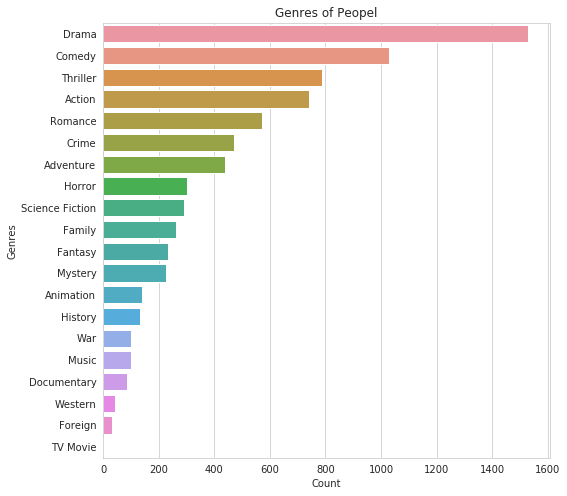

In [258]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.set_style("whitegrid")
ax = sns.barplot(x = df['Count'], y =   df.index, data = df)
ax.set(xlabel='Count',ylabel='Genres')
ax.set_title('Genres of Peopel')

In [0]:
df_train['num_genres'] = df_train['genres'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_genres'] = df_test['genres'].apply(lambda x: len(x) if x != {} else 0)